<a href="https://colab.research.google.com/github/CharanS-10/Data-Science/blob/main/BritishAirways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [5]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | London Heathrow to Male In...
1,Not Verified | Very good flight following an ...
2,Not Verified | An hour's delay due to late ar...
3,✅ Trip Verified | I booked through BA becaus...
4,✅ Trip Verified | British airways lost bags ...


In [7]:
import os
os.makedirs("data", exist_ok=True)
df.to_csv("data/BA_reviews.csv", index=False)

In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data/BA_reviews.csv")

# Define a function to clean text
def clean_text(text):
    if isinstance(text, str):  # Ensure the value is a string
        #text = text.replace("✅ Trip Verified ", "").strip()
        #text = text.replace("Not Verified ", "").strip()
        #text = text.replace("| ", "").strip()
        return text.replace("✅ Trip Verified", "").replace("Not Verified", "").replace("|","").strip()
    return text  # Return as is if it's not a string


# Apply the cleaning function to all string columns
df = df.applymap(clean_text)

# Save the cleaned data
df.to_csv("data/BA_reviews_cleaned.csv", index=False)

print("Data cleaned and saved successfully!")

Data cleaned and saved successfully!


<ipython-input-8-0a7041f17d8c>:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(clean_text)


In [9]:
import os

# Create "data" folder
os.makedirs('/content/data', exist_ok=True)

# Check if the file is uploaded
data_path = '/content/data/BA_reviews_cleaned.csv'  # Replace with your actual file name

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv(data_path)
df.head()

,reviews
0,London Heathrow to Male In new business class....
1,Very good flight following an equally good fli...
2,An hour's delay due to late arrival of the inc...
3,I booked through BA because Loganair don’t hav...
4,British airways lost bags in LHR then found th...


In [11]:
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Function to clean text
def clean_text(text):
    text = text.lower()  # Lowercase text
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

# Apply cleaning function to the text column (replace 'review' with the actual column name)
df['cleaned_review'] = df['reviews'].apply(clean_text)
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,reviews,cleaned_review
0,London Heathrow to Male In new business class....,london heathrow male new business class ba con...
1,Very good flight following an equally good fli...,good flight following equally good flight rome...
2,An hour's delay due to late arrival of the inc...,hours delay due late arrival incoming aircraft...
3,I booked through BA because Loganair don’t hav...,booked ba loganair don’t representatives manch...
4,British airways lost bags in LHR then found th...,british airways lost bags lhr found sent colog...
...,...,...
995,London to Shanghai. The Concorde room in Heath...,london shanghai concorde room heathrow termina...
996,I have often flown British Airways and have co...,often flown british airways considered good ai...
997,Good morning. I would like to write a review f...,good morning would like write review british a...
998,My flight was cancelled 3 days in a row. Was f...,flight cancelled 3 days row flying thursday fi...


In [12]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Vectorizing the cleaned text
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['cleaned_review'])

# Topic modeling using LDA
lda = LatentDirichletAllocation(n_components=5,random_state=42)  # Change number of topics as needed
lda.fit(X)

# Display topics
for index, topic in enumerate(lda.components_):
    print(f"Topic #{index}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])  # Top 10 words for each topic

Topic #0:
['class', 'seat', 'time', 'service', 'cabin', 'ba', 'food', 'crew', 'good', 'flight']
Topic #1:
['arrived', 'staff', 'gate', 'airline', 'hours', 'heathrow', 'time', 'london', 'ba', 'flight']
Topic #2:
['airline', 'class', 'seat', 'business', 'airways', 'seats', 'british', 'service', 'flight', 'ba']
Topic #3:
['got', 'service', 'airport', 'london', 'british', 'airways', 'ba', 'staff', 'flight', 'luggage']
Topic #4:
['london', 'time', 'airport', 'customer', 'airways', 'hours', 'british', 'service', 'ba', 'flight']


In [13]:
#!pip install vaderSentiment
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df['sentiment'] = df['cleaned_review'].apply(lambda x: sia.polarity_scores(x)['compound'])
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df['sentiment'] = df['cleaned_review'].apply(lambda x: sia.polarity_scores(x)['compound'])
df.tail()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,reviews,cleaned_review,sentiment
995,London to Shanghai. The Concorde room in Heath...,london shanghai concorde room heathrow termina...,0.9880
996,I have often flown British Airways and have co...,often flown british airways considered good ai...,-0.3182
997,Good morning. I would like to write a review f...,good morning would like write review british a...,0.9850
998,My flight was cancelled 3 days in a row. Was f...,flight cancelled 3 days row flying thursday fi...,-0.5736
999,Hong Kong to Copenhagen via London. The whole ...,hong kong copenhagen via london whole experien...,-0.9936


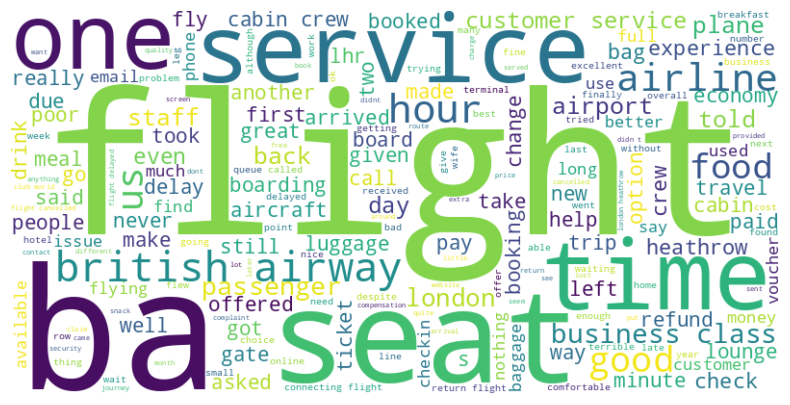

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud from cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_review']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

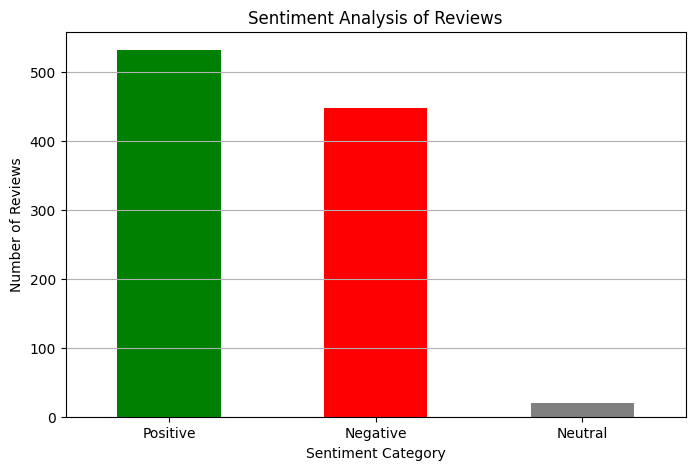

In [15]:
import numpy as np

# Categorize sentiment
df['sentiment_category'] = np.where(df['sentiment'] > 0.05, 'Positive',
                                    np.where(df['sentiment'] < -0.05, 'Negative', 'Neutral'))

# Count occurrences
sentiment_counts = df['sentiment_category'].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Analysis of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()